<a id="libraries"></a>
# <b><span style='color:#ff6200'> Iris Analysis</span></b>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

<a id="libraries"></a>
## <b><span style='color:#ff6200'> Data import</span></b>

In [2]:
df = pd.read_csv('iris.csv')

<a id="libraries"></a>
## <b><span style='color:#ff6200'> Informations </span></b>

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<a id="libraries"></a>
## <b><span style='color:#ff6200'> First Plots</span></b>

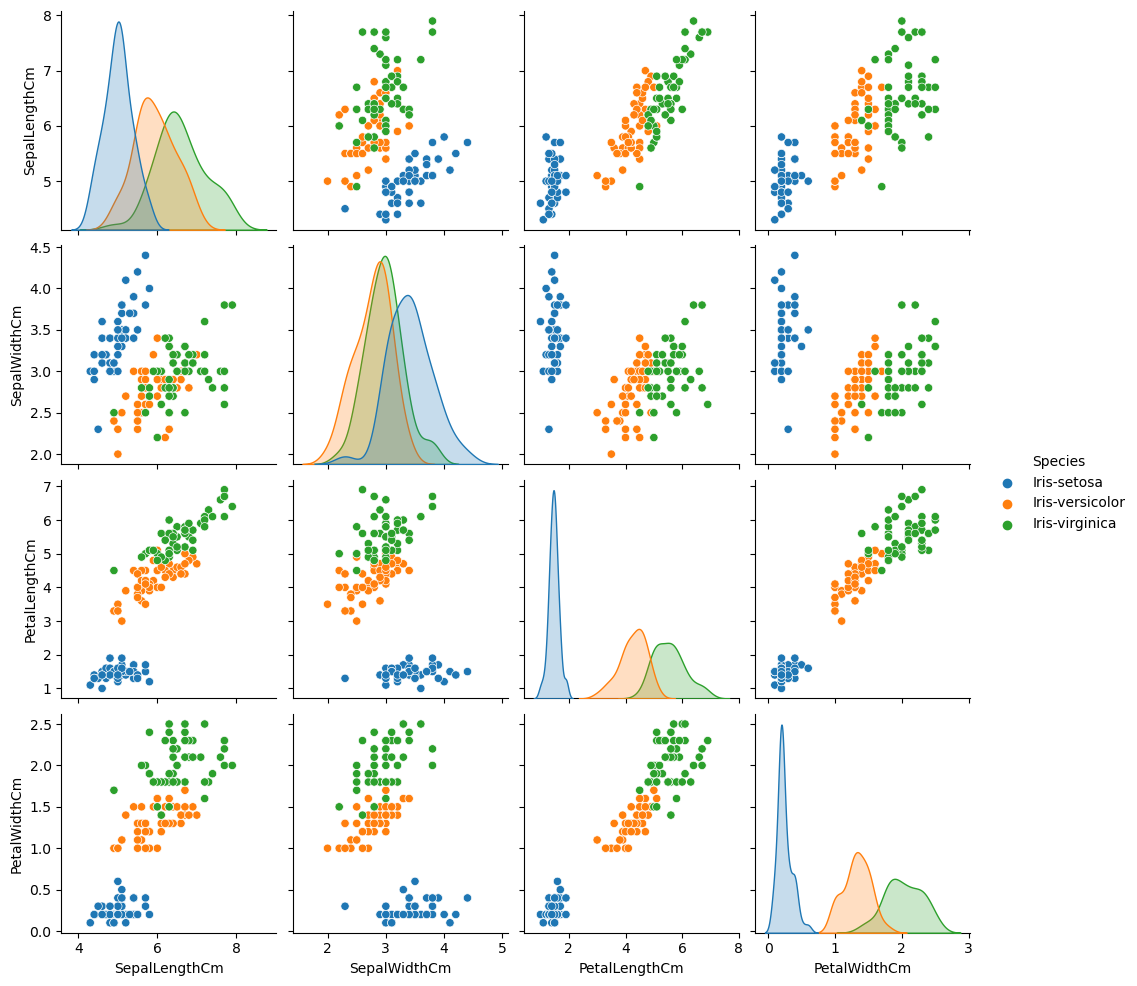

In [15]:
sns.pairplot(df, hue = 'Species')
plt.show()

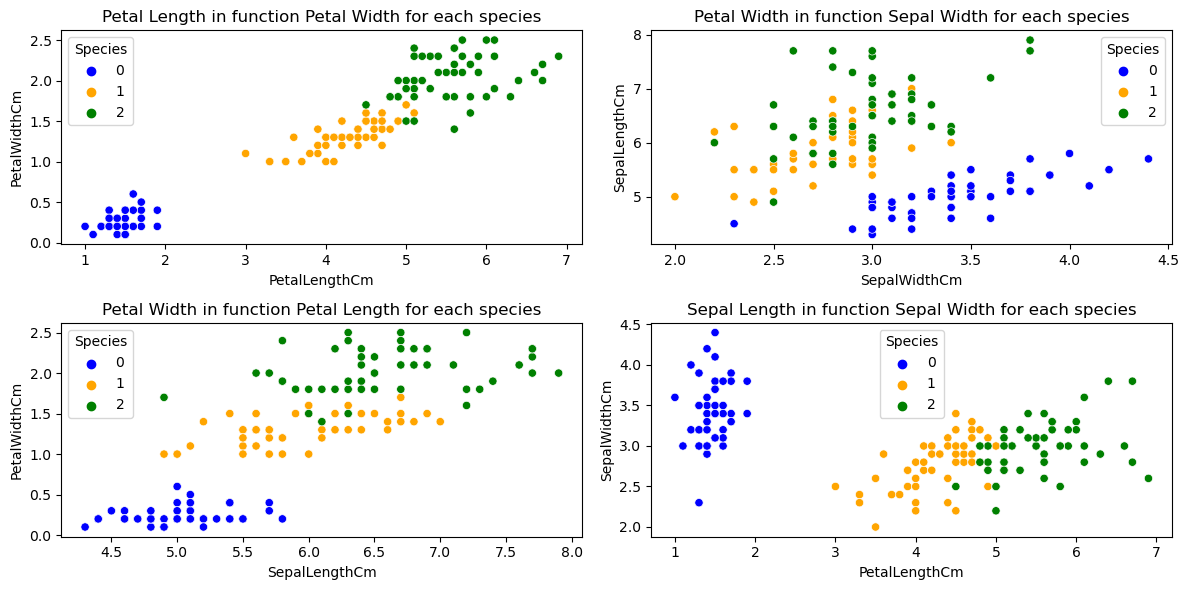

In [65]:
fig, ax = plt.subplots(2, 2, figsize = (12,6) )


sns.scatterplot( x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue = df['Species'], ax=ax[0,0], palette = ['blue', 'orange','green'])
ax[0,0].set_title("Petal Length in function Petal Width for each species")

sns.scatterplot(x=df['SepalWidthCm'], y=df['SepalLengthCm'], ax = ax[0,1], hue = df['Species'], palette = ['blue', 'orange','green'])
ax[0,1].set_title("Petal Width in function Sepal Width for each species")

sns.scatterplot( x=df['SepalLengthCm'], y=df['PetalWidthCm'], hue = df['Species'], ax=ax[1,0], palette = ['blue', 'orange','green'])
ax[1,0].set_title("Petal Width in function Petal Length for each species")

sns.scatterplot( x=df['PetalLengthCm'], y=df['SepalWidthCm'], ax = ax[1,1], hue = df['Species'], palette = ['blue', 'orange','green'])
ax[1,1].set_title("Sepal Length in function Sepal Width for each species")

plt.tight_layout()
plt.show()

The distribution is linear with a good approximation between petalLenthCm and petalWidthCm. $\newline$
If we take target = petalWidthCm = Y, a regression Linear will be very efficient (there will be a high coefficient for petalLenthCm)$\newline$


In Overall, species class are linearly separable in all these plots. $\newline$
Logistic regression, SvM, KNN is relevant to use when for species prediction

Class are clearly not linearly separable using only SepalLengthWidthCm and PetalWidthCM



<a id="libraries"></a>
## <b><span style='color:#ff6200'> Data Cleaning</span></b>

In [ ]:
df[df.isna()].sum()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species            0
dtype: object

In [3]:
# Dropping the column ID
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id="libraries"></a>
## <b><span style='color:#ff6200'> Linear correlation </span></b>

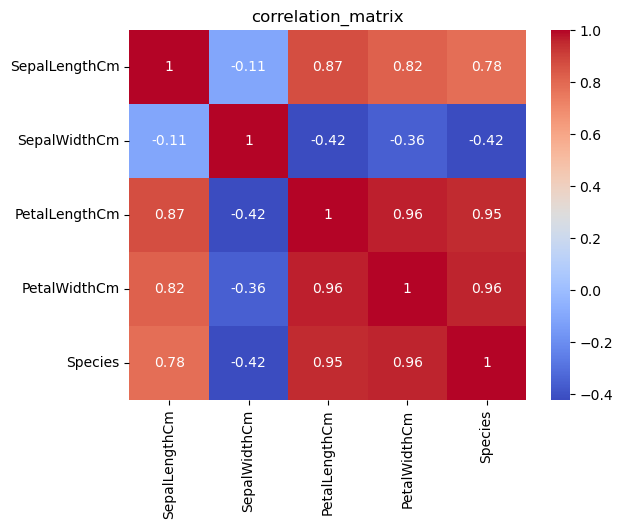

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('correlation_matrix')
plt.show()

The Species is highly linearly correlated with PetalWidthCm, PentalLendthCm and less but also with SepalLendth.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']])
vif = [variance_inflation_factor(X.values, i) for i in range(1,X.shape[1])]
vif

[31.39729165071975, 16.141563956997683, 7.103113442833287, 2.099038625742088]

'PetalLengthCm', 'PetalWidthCm' are higly correlated (VIF>10). $\newline$
I can delete 'PetalLengthCm', combine columns with PCA (loss of interpretability), use Ridge régularisation. $\newline$

In [20]:
X = add_constant(df[['PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']])
vif = [variance_inflation_factor(X.values,i) for i in range(1,X.shape[1])]
vif

[7.517264968170669, 6.2628727174038525, 1.8263253665530346]

In [22]:
X = add_constant(df[['PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']])
vif = [variance_inflation_factor(X.values,i) for i in range(1,X.shape[1])]
vif

[3.8646777121823304, 3.4142253390228627, 1.2945066660800213]

Deleting 'PetalLengthCm' is the best way to avoid multicolinéarity

<a id="libraries"></a>
## <b><span style='color:#ff6200'> Preprocessing </span></b>

## Encoding target value Labels

In [5]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [6]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

<a id="libraries"></a>
## <b><span style='color:#ff6200'> Target = Species </span></b>

## Spliting the dataset

In [18]:
X,y = df.drop('Species', axis = 1), df['Species']
X1 = df.drop(columns=['Species','PetalWidthCm' ])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 15)

## Standardisation

In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="libraries"></a>
## <b><span style='color:#ff6200'> Naive Bayes </span></b>

### A. Hypothesis

1. Conditional independance of the features

To use the formula : $P(X_1, X_2, ..., X_n \mid Y) = \prod_{i} P(X_i \mid Y)$ $\newline$
We need each each features ti be independant given a class $\newline$

for X = df[['PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']] we have low VIF<5. $\newline$
Which is ok for Naive Bayesian model which works well with weak dependencies features


1. Gaussian distribution per class for our continuous features

We have seen in the pair plot that every features have, in very good approximation, a gaussian distribution 

## B.Application

X = df.drop(columns = ["Species", "PetalWidthCm"]) to deal with colinearity

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Fit and training
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred = gnb.predict(X_test_scaled)

---------- Statistic with X = df.drop(columns = ["Species", "PetalWidthCm"]) to deal with colinearity ----------
score : 0.9210526315789473
--------------------------------------------------------------------------------
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.87      0.90        15
           2       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.92      0.92      0.92        38

--------------------------------------------------------------------------------
Confusion matrix


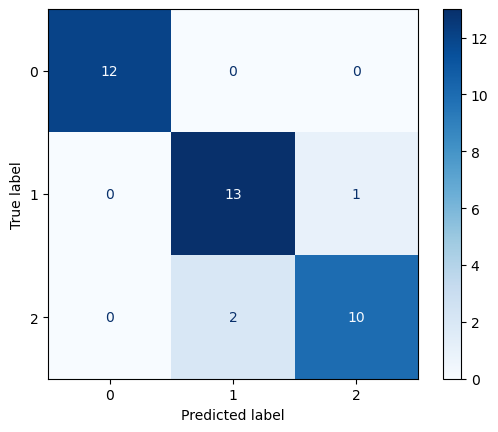

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# Score
print('-'*10 + ' Statistic with X = df.drop(columns = ["Species", "PetalWidthCm"]) to deal with colinearity '+'-'*10)
print(f'score : {accuracy_score(y_test,y_pred)}')
print('-'*80)
print(f'classification report: \n {classification_report(y_pred,y_test)}')
print('-'*80)
print('Confusion matrix')

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Blues')
plt.show()


X = df.drop(columns = ["Species"]). We want to see the impact of multicolinearity on this model

In [21]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred = gnb.predict(X_test_scaled)

----------X = df.drop(columns = ["Species"])to see the impact of multicolinearity on this model ----------
score: 1.0
--------------------------------------------------------------------------------
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

--------------------Confusion Matrix--------------------


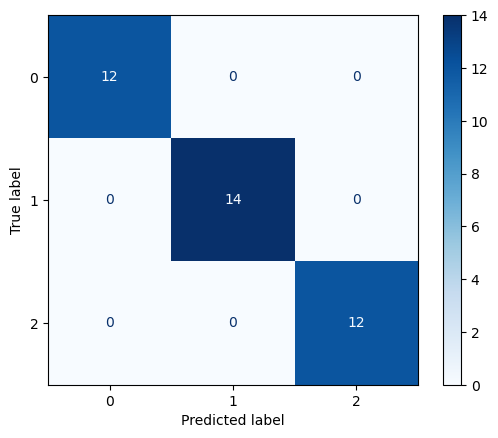

In [ ]:
print('-'*10 + ' X = df.drop(columns = ["Species"])to see the impact of multicolinearity on this model '+'-'*10)
print(f'score: {accuracy_score(y_test,y_pred)}')
print('-'*80)
print(f'classification report: \n {classification_report(y_test,y_pred)}')
print('-'*20 + 'Confusion Matrix' + '-'*20)
cm =confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap ='Blues')
plt.show()

Conclusion: $\newline$
Removing multicolinearity was useless. $\newline$
Naive Bayesian requires independance between features to apply Bayes probability formula $\newline$
However, it works better without deleting the column:
- first because the classes are quite perfectly separable in function of PetalWidth and SepalWidth
- It is robuste to variable dependancy becaus it doesn't look for the perfect probability distribution which fit the model. It looks for the class with the higher probability
- Remove one feature delete some information (the linearity is a good approximation but not perfect) 


<a id="libraries"></a>
## <b><span style='color:#ff6200'> Logistic Regression </span></b>

## A. hypothesis $\newline$
The classes are almost every time linearly separable (especially not when X1 = SepalWidthCm, X2 = SeplaLengthCm)


## B. Application

In [26]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled,y_train)
y_pred = log.predict(X_test_scaled)

----------
---------- Statistic with X = df.drop(columns = ["Species", "PetalWidthCm"]) to deal with colinearity ----------
score = 1.0
--------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

--------------------------------------------------------------------------------
-------------------- confusion matrix --------------------


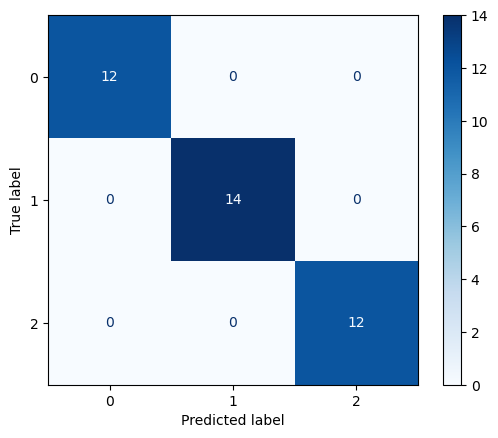

In [30]:
print('-'*10 + '')
print('-'*10 + ' Statistic with X = df.drop(columns = ["Species", "PetalWidthCm"]) to deal with colinearity '+'-'*10)
print(f'score = {accuracy_score(y_test,y_pred)}')
print('-'*80)
print(f'classification report : \n {classification_report(y_test,y_pred)}')
print('-'*80)
print('-'* 20 + ' confusion matrix ' + '-'*20)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.show()

<a id="libraries"></a>
## <b><span style='color:#ff6200'> SVM classifier </span></b>

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)

score : 1.0
--------------------------------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

--------------------------------------------------------------------------------
-------------------- confusion matrix --------------------


[]

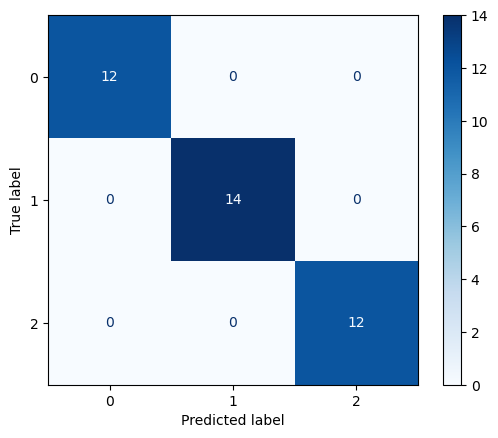

In [31]:
print(f'score : {accuracy_score(y_test,y_pred)}')
print('-'*80)
print(f'classification report : \n {classification_report(y_test,y_pred)}')
print('-'*80)
print('-'*20 + ' confusion matrix ' + '-'*20)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.plot()